In [1]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:

stim_csv =  sorted(str(p) for p in pathlib.Path("C:/Users/Oleg/Desktop/Paris Saclay/These/2_SCRIPT/exp_1/path_150").glob("*.csv"))
stim_csv 

['C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid_ind.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid_left_left_150.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid_left_right_150.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid_right_left_150.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\iid_right_right_150.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\rdw.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\rdw_ind.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\rdw_left_left_150.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris Saclay\\These\\2_SCRIPT\\exp_1\\path_150\\rdw_left_right_150 - Copie.csv',
 'C:\\Users\\Oleg\\Desktop\\Paris S

In [61]:
iid_left_right = pd.read_csv(stim_csv[3], header=None).to_numpy()
rdw_left_right = pd.read_csv(stim_csv[9], header=None).to_numpy()
iid_right_left  = pd.read_csv(stim_csv[4], header=None).to_numpy()
rdw_right_left = pd.read_csv(stim_csv[11], header=None).to_numpy()

In [4]:
#49 not  8 ok

In [27]:
iid_left_right[1:,][iid_left_right[1:,] == 0] = np.nan # or use np.nan
rdw_left_right[1:,][rdw_left_right[1:,] == 0] = np.nan # or use np.nan
iid_right_left[1:,][iid_right_left[1:,] == 0] = np.nan # or use np.nan
rdw_right_left[1:,][rdw_right_left[1:,] == 0] = np.nan # or use np.nan

In [62]:
iid_left_right.shape

(150, 50)

In [53]:
iid_left_right[1:,][iid_left_right[1:,] == 0] = np.nan

In [65]:
iid_left_right[:,i][1:, ]

array([ -7.91874807,  -8.56918454,   6.19686246,  -5.06174764,
       -11.6281464 ,   4.49013235,   9.60877734,   3.09741819,
        -1.48800875,   6.44116632,  -6.00470978,   1.23156817,
        -2.81769497,  -4.51791346,   1.25165243,  -2.82022321,
         8.19073541,   7.67195477,  -3.61366507,   2.33083503,
        -3.61098371,  10.6772035 ,  -2.35823859,  -5.77528423,
         6.71505647, -11.63362147,   5.65461471,   8.72348888,
         3.21738264,   3.53745624,  -6.34348911,  -2.49419063,
        -9.00396133,  -1.41844301,   3.27268078,  -1.69638056,
         0.71236087, -12.88639059,  -0.30977621,  -1.8072068 ,
        -2.46840753,   3.47598327,  -7.66137384,  -5.08291349,
         0.85828722,  -7.17028985,   7.57003024,  -6.39767413,
         8.51173251,  -4.37840668,  -0.82840876,  -8.56307125,
         9.58886385,  -5.0464346 ,   6.35182068,  -3.28846205,
         6.65488949,  -1.3897208 ,  -8.06637821,  -4.100955  ,
         4.37869603,  -6.87029586,  -5.68299434, -11.02

In [4]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [5]:
color=sns.color_palette('pastel')[5]

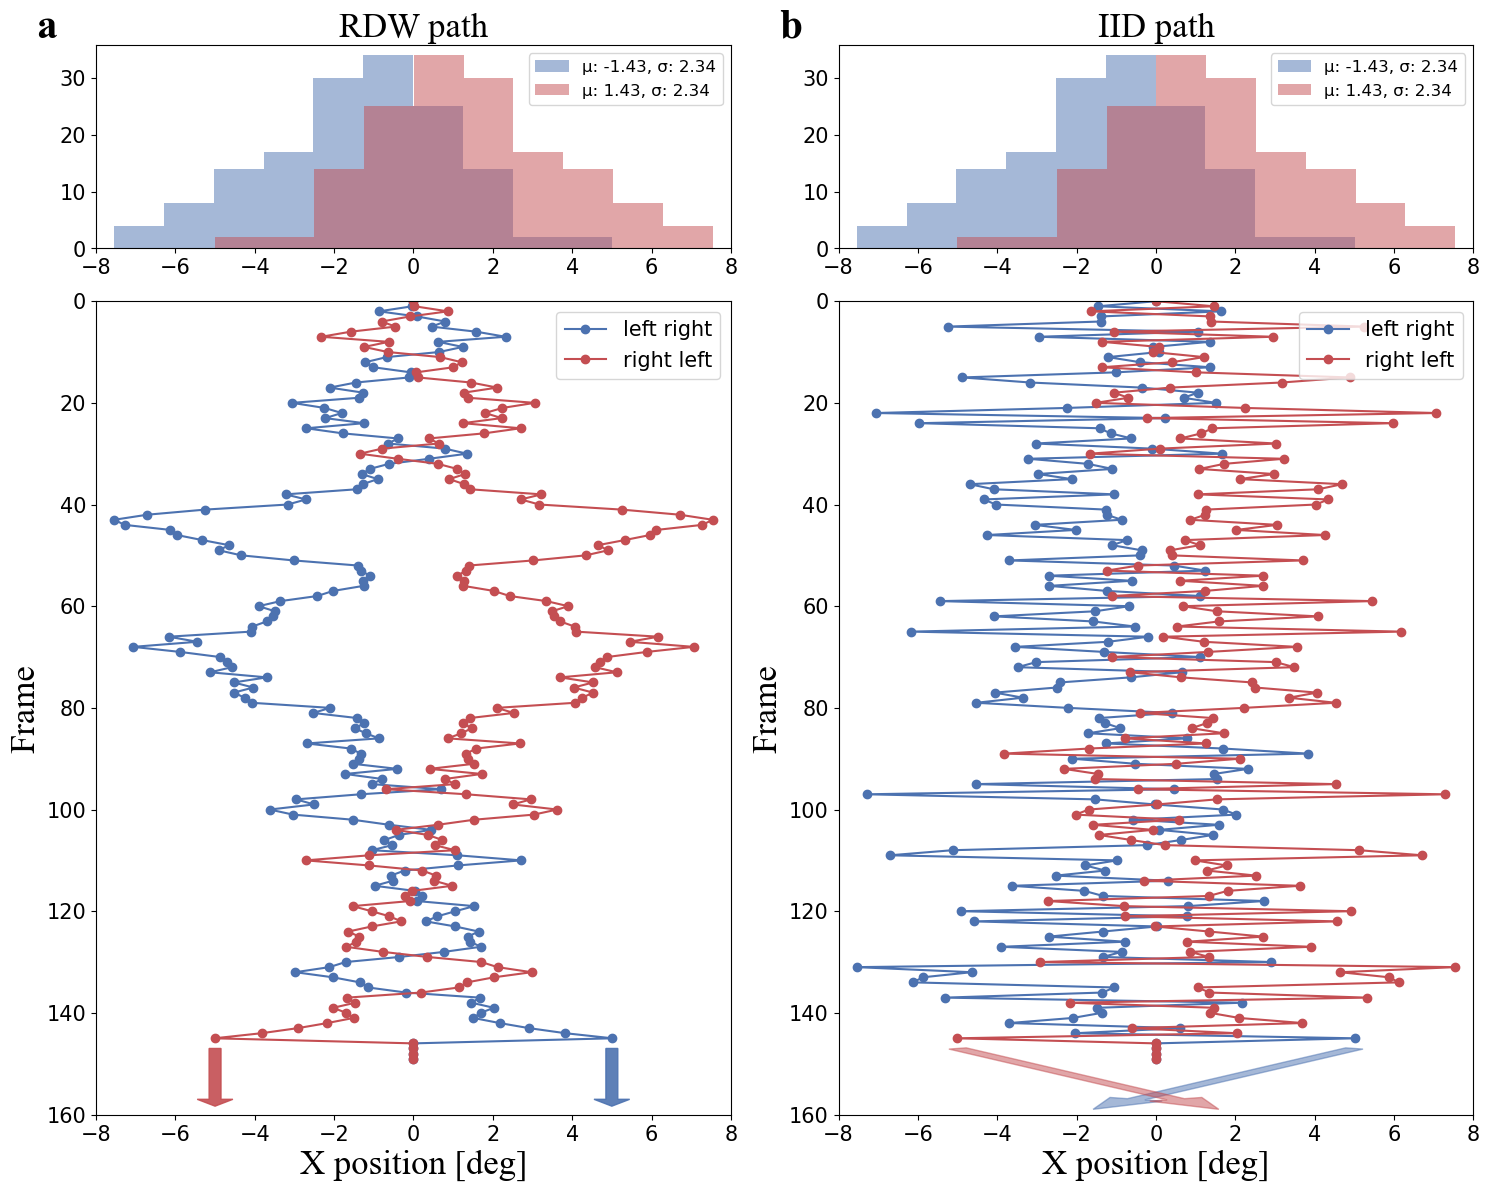

In [7]:
i = 2
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2,figsize=(15, 12),gridspec_kw={'height_ratios': [1, 4]})

    # Plotting the histogram
ax3.hist(iid_left_right[:,i], label=f'μ: {round(np.nanmean(iid_left_right[:,i]),2)}, σ: {round(np.nanstd(iid_left_right[:,i]),2)}', alpha=0.5, bins=10,
        color=sns.color_palette('deep')[0])
ax3.hist(iid_right_left[:,i], label=f'μ: {round(np.nanmean(iid_right_left[:,i]),2)}, σ: {round(np.nanstd(iid_right_left[:,i]),2)}', alpha=0.5, bins=10,
        color=sns.color_palette('deep')[3])
ax3.legend(fontsize=12, loc='upper right')
ax3.set_xlim(-8, 8)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_title('IID path', fontname="Times New Roman", fontsize=25)
ax3.text(-9.5, 37, 'b',fontsize=30, fontname="Times New Roman",weight='bold')


    # Plotting the line graph
ax4.plot(iid_left_right[:,i], range(len(iid_left_right[:,i])), 'o-', label='left right',color=sns.color_palette('deep')[0])
ax4.plot(iid_right_left[:,i], range(len(iid_right_left[:,i])), 'o-', label='right left',color=sns.color_palette('deep')[3])
ax4.set_xlabel('X position [deg]', fontname="Times New Roman", fontsize=25)
ax4.set_ylabel('Frame', fontname="Times New Roman", fontsize=25)
plt.gca().invert_yaxis()
ax4.set_xlim(-8, 8)
ax4.set_ylim(160, 0)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15, loc='upper right')


# Plotting the histogram
ax1.hist(rdw_left_right[:,i], label=f'μ: {round(np.nanmean(rdw_left_right[:,i]),2)}, σ: {round(np.nanstd(rdw_left_right[:,i]),2)}', alpha=0.5, bins=10,
        color=sns.color_palette('deep')[0])
ax1.hist(rdw_right_left[:,i], label=f'μ: {round(np.nanmean(rdw_right_left[:,i]),2)}, σ: {round(np.nanstd(rdw_right_left[:,i]),2)}', alpha=0.5, bins=10,
        color=sns.color_palette('deep')[3])
ax1.legend(fontsize=12, loc='upper right')
ax1.set_xlim(-8, 8)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('RDW path', fontname="Times New Roman", fontsize=25)
ax1.text(-9.5, 37, 'a',fontsize=30, fontname="Times New Roman",weight='bold')

# Plotting the line graph
ax2.plot(rdw_left_right[:,i], range(len(rdw_left_right[:,i])), 'o-', label='left right',color=sns.color_palette('deep')[0])
ax2.plot(rdw_right_left[:,i], range(len(rdw_right_left[:,i])), 'o-', label='right left',color=sns.color_palette('deep')[3])
ax2.set_xlabel('X position [deg]', fontname="Times New Roman", fontsize=25)
ax2.set_ylabel('Frame', fontname="Times New Roman", fontsize=25)
# plt.gca().invert_yaxis()
ax2.set_xlim(-8, 8)
ax2.set_ylim(160, 0)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(fontsize=15, loc='upper right')
ax4.arrow(x=5, y=147, dx=-5.5, dy=10, width=0.5,facecolor=sns.color_palette('deep')[0],alpha=0.5, edgecolor=sns.color_palette('deep')[0],)
ax4.arrow(x=-5, y=147, dx=5.5, dy=10, width=0.5,facecolor=sns.color_palette('deep')[3],alpha=0.5, edgecolor=sns.color_palette('deep')[3],)

ax2.arrow(x=5, y=147, dx=0, dy=10, width=0.3,facecolor=sns.color_palette('deep')[0],alpha=0.9, edgecolor=sns.color_palette('deep')[0],)
ax2.arrow(x=-5, y=147, dx=0, dy=10, width=0.3,facecolor=sns.color_palette('deep')[3],alpha=0.9, edgecolor=sns.color_palette('deep')[3],)      

plt.tight_layout()  # Adjust spacing between subplots


# plt.show()
# plt.savefig('path_opposite.png', dpi=300)

In [20]:
iid_ok = iid_left_right[:,19]

iid_bad = iid_left_right[:,47]

In [9]:
import matplotlib.gridspec as gridspec
def visual(path_5, path_15):

    # for i in range(path_5.shape[1]):
        fig = plt.figure(figsize=(13, 18))
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 2, 2])

        for idx, path, percentage in zip([0, 1], [path_5, path_15], [5, 5]):
            inv = len(np.where(path[1:, ] == 0)[0])
            iid_trajectory = path[:-(inv), ]
            
            # Средние и стандартные отклонения
            mean_iid = round(np.mean(iid_trajectory), 2)
            std = round(np.std(iid_trajectory), 2)
            last_percent = int(len(iid_trajectory) * (percentage / 100))
            mean_last_percent_iid = round(np.mean(iid_trajectory[-last_percent:]), 2)
            
            y_start_last_5 = len(iid_trajectory) - int(len(iid_trajectory) * mean_last_percent_iid/100)
            # Основной график траектории
            ax_traj = fig.add_subplot(gs[2, idx])
            ax_traj.plot(iid_trajectory, range(len(iid_trajectory)), 'o-', color=sns.color_palette('deep')[0])
            ax_traj.plot(iid_trajectory[-last_percent:], range(len(iid_trajectory)-last_percent, len(iid_trajectory)), 'o-', 
                         color=sns.color_palette('deep')[2])
            ax_traj.plot(iid_trajectory[-1], len(iid_trajectory) - 1, 'o', color=sns.color_palette('deep')[2])
            
            ax_traj.axvline(x=mean_iid, color=sns.color_palette('deep')[0], linestyle='--', label=f'Overall path (μ: {mean_iid}, σ: {std})')
            ax_traj.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
#             ax_traj.axvline(x=mean_last_percent_iid, color='blue', linestyle='--', label=f'Last {percentage}% mean: {mean_last_percent_iid}')
            # Drawing a line for the last 5% average starting from its corresponding y-coordinate
            ax_traj.plot([mean_last_percent_iid,mean_last_percent_iid], [y_start_last_5, 160], color='green', 
                         linestyle='--', label=f'Last {percentage}% of the path', alpha = 0.4, linewidth=1.4)

            # ax_traj.text(mean_iid,130, f'Overall mean: {mean_iid:.2f}', color=sns.color_palette('deep')[0], 
            #         verticalalignment='top', horizontalalignment='right',
            #         fontname="Times New Roman", fontsize=15)
            ax_traj.text(mean_last_percent_iid, 140, f'Last {percentage}% mean: {mean_last_percent_iid:.2f}', 
                         color=sns.color_palette('deep')[2],verticalalignment='top', 
                         fontname="Times New Roman", fontsize=15,horizontalalignment='left')
            
#             ax_traj.set_title(f'IID path with overall mean NOT EQUAL \n to the average of the last {percentage}%',
#                              fontname="Times New Roman", fontsize=18,)
            ax_traj.set_xlim(-20, 20)
#             ax_traj.set_ylim(0, 150)
            ax_traj.set_ylim(150, -1)
            ax_traj.legend(fontsize=12,loc='upper right')
            plt.ylabel('Frame', fontname="Times New Roman", fontsize=18)
            plt.xlabel('X position [deg]', fontname="Times New Roman", fontsize=18)
            plt.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

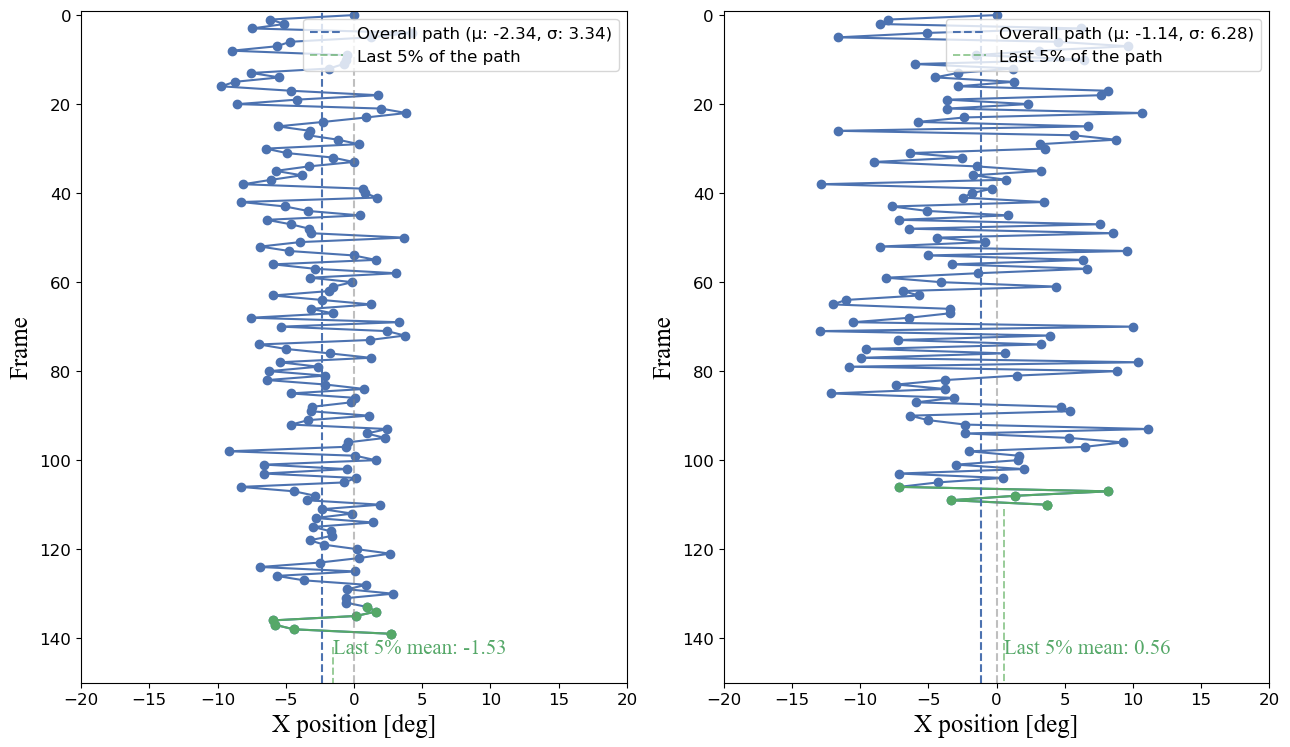

In [10]:
visual (iid_ok ,iid_bad)

In [3]:
# reg
path_info = pd.read_csv('info_iid_opposite_28s.csv',sep =";", header=0)
path_info['acc'] =path_info['correct'].apply(lambda x: x/28 )

In [4]:
path_info

,inex path,index path 2,path,cond,mean_cond,Mean,Mean_last15,Mean_last10,Mean_last5,Standard Deviation,...,Count 0 (right resp),Count 1 (left resp),correct,error,mean=last15,mean=last10,mean=last5,ok,more corr answ,acc
0,0,0,iid,opposite,left,-2.211,-2.448,-2.135,-1.520,2.753,...,4.0,24.0,24.0,4.0,y,y,y,y,1,0.857143
1,1,1,iid,opposite,left,-0.775,0.450,1.340,1.368,2.342,...,16.0,12.0,12.0,16.0,n,n,n,n,0,0.428571
2,2,2,iid,opposite,left,-1.467,-2.319,-0.955,-0.441,2.355,...,4.0,24.0,24.0,4.0,y,y,y,y,1,0.857143
3,3,3,iid,opposite,left,-0.934,-0.956,-1.798,-0.667,2.666,...,7.0,21.0,21.0,7.0,y,y,y,y,1,0.750000
4,4,4,iid,opposite,left,-1.087,-0.728,-1.520,-2.003,2.954,...,4.0,24.0,24.0,4.0,y,y,y,y,1,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,iid,opposite,right,1.854,1.604,0.562,-3.925,6.381,...,14.0,14.0,14.0,14.0,y,y,n,n,0,0.500000
96,96,46,iid,opposite,right,1.952,2.365,1.649,4.229,6.020,...,21.0,7.0,21.0,7.0,y,y,y,y,1,0.750000
97,97,47,iid,opposite,right,1.307,-1.930,-1.026,-3.596,6.295,...,10.0,18.0,10.0,18.0,n,n,n,n,0,0.357143
98,98,48,iid,opposite,right,0.888,-0.026,-0.822,1.076,6.245,...,21.0,7.0,21.0,7.0,n,n,y,y,1,0.750000


In [5]:
def path_responces_exp1 (path_info):
    
    path_info = path_info.drop(['ok', "more corr answ", "mean=last10"], axis = 1)
    path_info['mean/std'] = round(abs(abs(path_info['Mean'])/ path_info['Standard Deviation']),3)
    path_info['acc'] = path_info['correct'].apply(lambda x: np.round( x/28,3) )
    group_sd = []
    intervals_sd = create_intervals(path_info['Standard Deviation'].min(), path_info['Standard Deviation'].max(), 
                                    path_info['Standard Deviation'].mean())
    print(intervals_sd)
    for i in range(path_info.shape[0]):
        if path_info['Standard Deviation'][i] < 3.3:
            group_sd.append(1)
        if 3.3<= path_info['Standard Deviation'][i] < 5.5:
            group_sd.append(2) 
    #     if 4.42 <= df['sd'][i] < 5.7:
    #         group_sd.append(3)     
        if path_info['Standard Deviation'][i] >=5.5:
            group_sd.append(3)  
    path_info["group_sd"] = group_sd
    
    diff_list = []

    jnd_values = {1: 0.62, 2: 0.89, 3: 1.27}
    # jnd_values = {1: 1.34, 2: 1.30, 3: 2.26}
    for i in range(path_info.shape[0]):
        group = path_info['group_sd'][i]
        jnd = jnd_values[group]
    #     diff = round(abs(iid_opposite_data['mean_abs'][i] - jnd), 3)
        diff = round(abs(path_info['Mean'][i]) - jnd, 3)
        diff_list.append(diff)

    path_info['mu-jnd'] = diff_list
    return path_info


def create_intervals(min_value, max_value, mean_value):
    # Small interval
    small_interval = [min_value, round(mean_value - (mean_value - min_value) / 2,3)]
    # Mean interval
    mean_interval = [round(mean_value - (mean_value - min_value) / 2,3), round(mean_value + (max_value - mean_value) / 2,3)]
    # Big interval
    big_interval = [round(mean_value + (max_value - mean_value) / 2,3), max_value]
    return small_interval, mean_interval, big_interval

In [6]:
path_info = path_responces_exp1(path_info)


([2.128, 3.305], [3.305, 5.507], [5.507, 6.532])


In [12]:
path_info

,inex path,index path 2,path,cond,mean_cond,Mean,Mean_last15,Mean_last10,Mean_last5,Standard Deviation,...,Count 0 (right resp),Count 1 (left resp),correct,error,mean=last15,mean=last5,acc,mean/std,group_sd,mu-jnd
0,0,0,iid,opposite,left,-2.211,-2.448,-2.135,-1.520,2.753,...,4.0,24.0,24.0,4.0,y,y,0.857,0.803,1,1.591
1,1,1,iid,opposite,left,-0.775,0.450,1.340,1.368,2.342,...,16.0,12.0,12.0,16.0,n,n,0.429,0.331,1,0.155
2,2,2,iid,opposite,left,-1.467,-2.319,-0.955,-0.441,2.355,...,4.0,24.0,24.0,4.0,y,y,0.857,0.623,1,0.847
3,3,3,iid,opposite,left,-0.934,-0.956,-1.798,-0.667,2.666,...,7.0,21.0,21.0,7.0,y,y,0.750,0.350,1,0.314
4,4,4,iid,opposite,left,-1.087,-0.728,-1.520,-2.003,2.954,...,4.0,24.0,24.0,4.0,y,y,0.857,0.368,1,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,iid,opposite,right,1.854,1.604,0.562,-3.925,6.381,...,14.0,14.0,14.0,14.0,y,n,0.500,0.291,3,0.584
96,96,46,iid,opposite,right,1.952,2.365,1.649,4.229,6.020,...,21.0,7.0,21.0,7.0,y,y,0.750,0.324,3,0.682
97,97,47,iid,opposite,right,1.307,-1.930,-1.026,-3.596,6.295,...,10.0,18.0,10.0,18.0,n,n,0.357,0.208,3,0.037
98,98,48,iid,opposite,right,0.888,-0.026,-0.822,1.076,6.245,...,21.0,7.0,21.0,7.0,n,y,0.750,0.142,3,-0.382


In [14]:
groups

array(['left', 'right'], dtype=object)

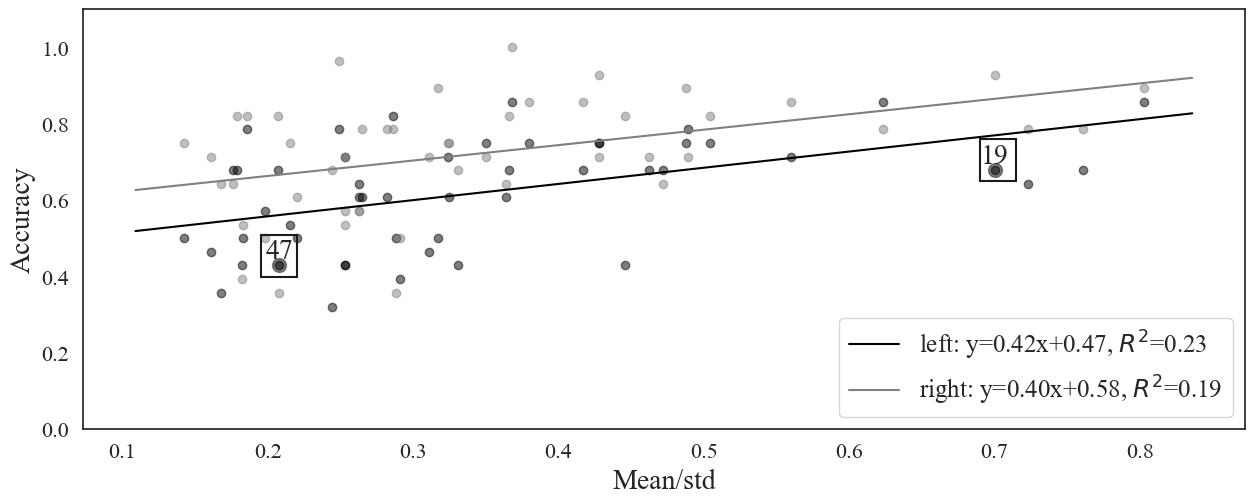

In [40]:
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5], hspace=0.2)
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20
})


ax0 = fig.add_subplot(gs[0, :])
colors = ['black', 'gray', 'silver'] 
groups = path_info['mean_cond'].unique()

for i, group in enumerate(groups):
    subset = path_info[path_info['mean_cond'] == group]
    ax0.scatter(subset['mean/std'], subset['acc'], alpha=0.5, c=colors[i])
    special_points = subset[subset['inex path'].isin([19, 47])]
    ax0.scatter(special_points['mean/std'], special_points['acc'], alpha=0.5, c=colors[i], s=100, edgecolor='k')
    for idx, row in subset.iterrows():
        if row['inex path'] in [19, 47]:  
            ax0.annotate(row['inex path'], (row['mean/std'], row['acc']),
                        textcoords="offset points", xytext=(0, 5), ha='center')
    slope, intercept, r_value, p_value, std_err = linregress(path_info['mean/std'], path_info['acc'])
    x_vals = np.array(ax0.get_xlim())
    y_vals = intercept + slope * x_vals
    # ax0.plot(x_vals, y_vals, '--', color='black', label=f'Overall: y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}')
for i, group in enumerate(groups):
    group_data = path_info[path_info['mean_cond'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(group_data['mean/std'], group_data['acc'])
    y_vals = intercept + slope * x_vals
    ax0.plot(x_vals, y_vals, '-', color=colors[i], label=f'{group}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}')
    ax0.set_xlabel('Mean/std', fontname="Times New Roman", fontsize=20)
    ax0.set_ylabel('Accuracy', fontname="Times New Roman", fontsize=20)
    ax0.set_ylim(0,1.1) 
    ax0.legend(loc='lower right',  fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
rect1 = patches.Rectangle((0.195, 0.4), 0.025, 0.11, linewidth=1.5, edgecolor='k', facecolor='none')
rect2 = patches.Rectangle((0.69, 0.65), 0.025, 0.11, linewidth=1.5, edgecolor='k', facecolor='none')
ax0.add_patch(rect1)
ax0.add_patch(rect2)
# ax0.text(0.19, 0.41, 'a', fontsize=30, ha='center', fontname="Times New Roman",weight='bold')
# ax0.text(0.68, 0.62, 'b', fontsize=30, ha='center',fontname="Times New Roman",weight='bold')

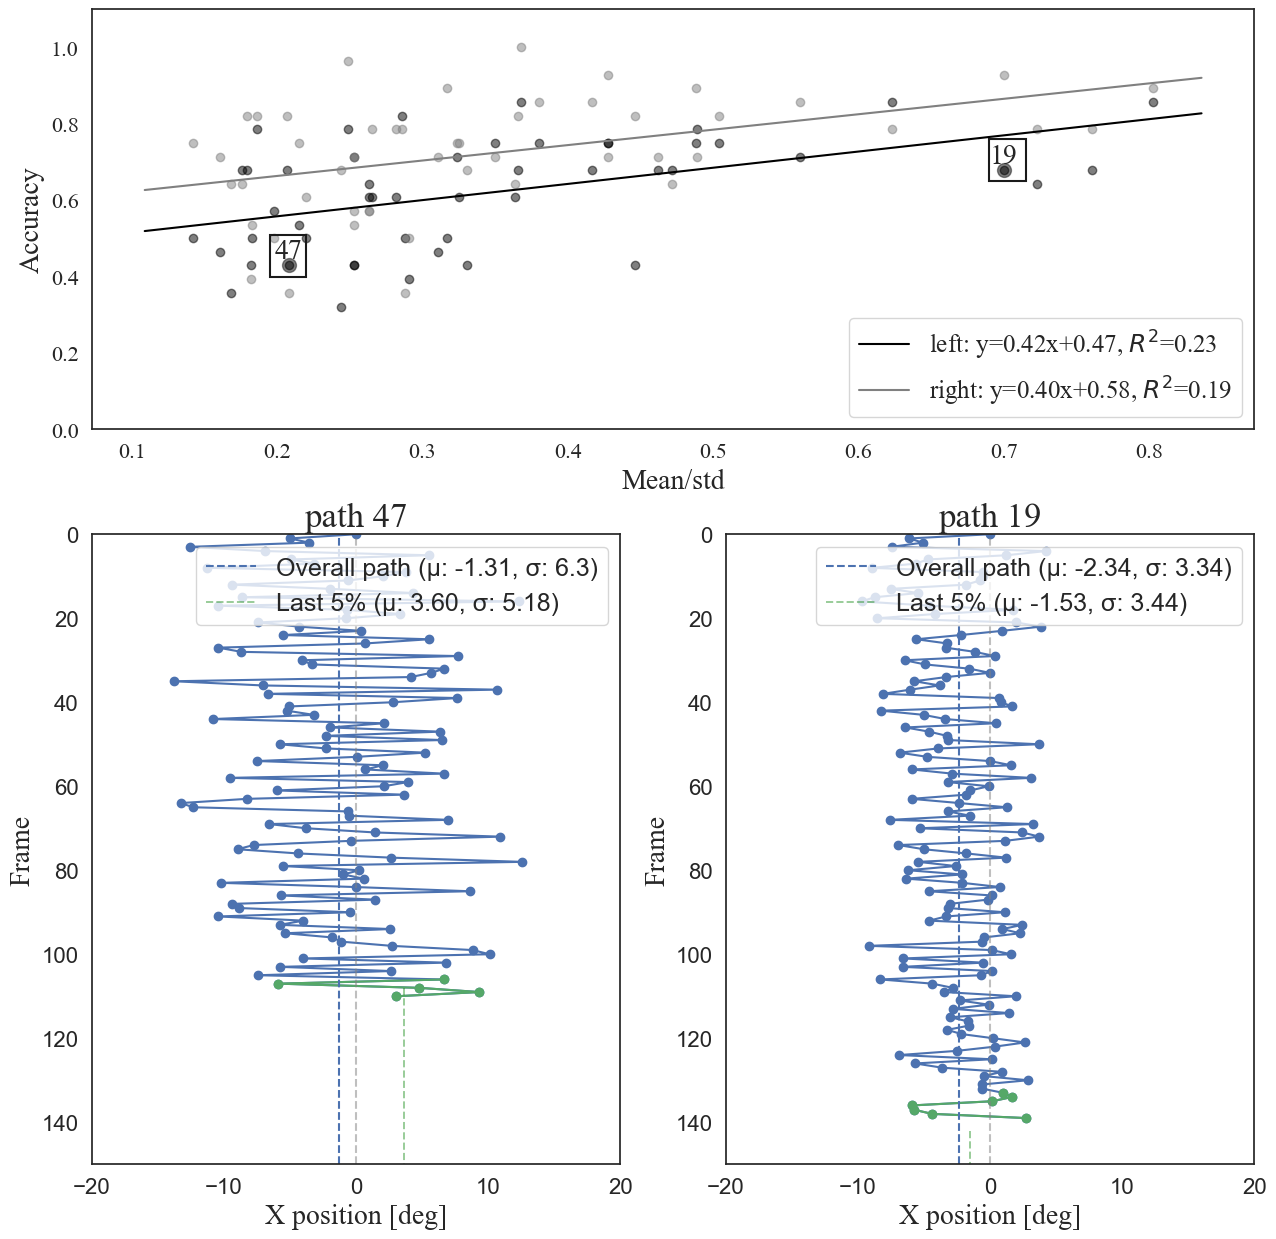

In [50]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5], hspace=0.2)
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20
})


ax0 = fig.add_subplot(gs[0, :])
colors = ['black', 'gray', 'silver'] 
groups = path_info['mean_cond'].unique()

for i, group in enumerate(groups):
    subset = path_info[path_info['mean_cond'] == group]
    ax0.scatter(subset['mean/std'], subset['acc'], alpha=0.5, c=colors[i])
    special_points = subset[subset['inex path'].isin([19, 47])]
    ax0.scatter(special_points['mean/std'], special_points['acc'], alpha=0.5, c=colors[i], s=100, edgecolor='k')
    for idx, row in subset.iterrows():
        if row['inex path'] in [19, 47]:  
            ax0.annotate(row['inex path'], (row['mean/std'], row['acc']),
                        textcoords="offset points", xytext=(0, 5), ha='center')
    slope, intercept, r_value, p_value, std_err = linregress(path_info['mean/std'], path_info['acc'])
    x_vals = np.array(ax0.get_xlim())
    y_vals = intercept + slope * x_vals
    # ax0.plot(x_vals, y_vals, '--', color='black', label=f'Overall: y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}')
for i, group in enumerate(groups):
    group_data = path_info[path_info['mean_cond'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(group_data['mean/std'], group_data['acc'])
    y_vals = intercept + slope * x_vals
    ax0.plot(x_vals, y_vals, '-', color=colors[i], label=f'{group}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}')
    ax0.set_xlabel('Mean/std', fontname="Times New Roman", fontsize=20)
    ax0.set_ylabel('Accuracy', fontname="Times New Roman", fontsize=20)
    ax0.set_ylim(0,1.1) 
    ax0.legend(loc='lower right',  fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
rect1 = patches.Rectangle((0.195, 0.4), 0.025, 0.11, linewidth=1.5, edgecolor='k', facecolor='none')
rect2 = patches.Rectangle((0.69, 0.65), 0.025, 0.11, linewidth=1.5, edgecolor='k', facecolor='none')
ax0.add_patch(rect1)
ax0.add_patch(rect2)

def visual(fig, gs, path_5, path_15):
    sns.set(style="white")
    axs = []

    for idx, (path, percentage, title) in enumerate(zip([path_5, path_15], [5, 5],['path 47', 'path 19'])):
        ax_traj = fig.add_subplot(gs[1, idx])
        axs.append(ax_traj)
        inv = len(np.where(path[1:, ] == 0)[0])
        iid_trajectory = path[:-(inv), ]
        mean_iid = round(np.mean(iid_trajectory), 2)
        std = round(np.std(iid_trajectory), 2)
        last_percent = int(len(iid_trajectory) * (percentage / 100))
        mean_last_percent_iid = round(np.mean(iid_trajectory[-last_percent:]), 2)
        std_last_percent_iid = round(np.std(iid_trajectory[-last_percent:]), 2)
        y_start_last_5 = len(iid_trajectory) - int(len(iid_trajectory) * mean_last_percent_iid/100)
        
        ax_traj.plot(iid_trajectory, range(len(iid_trajectory)), 'o-', color=sns.color_palette('deep')[0])
        ax_traj.plot(iid_trajectory[-last_percent:], range(len(iid_trajectory)-last_percent, len(iid_trajectory)), 'o-', color=sns.color_palette('deep')[2])
        ax_traj.axvline(x=mean_iid, color=sns.color_palette('deep')[0], linestyle='--', label=f'Overall path (μ: {mean_iid}, σ: {std})')
        ax_traj.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
        ax_traj.plot([mean_last_percent_iid, mean_last_percent_iid], [y_start_last_5, 160], color='green', linestyle='--', label=f'Last {percentage}% (μ: {mean_last_percent_iid:.2f}, σ: {std_last_percent_iid})', alpha=0.4, linewidth=1.4)
        ax_traj.set_xlim(-20, 20)
        ax_traj.set_ylim(150, 0)
        ax_traj.legend(fontsize=18, loc='upper right')
        ax_traj.set_ylabel('Frame', fontname="Times New Roman", fontsize=20)
        ax_traj.set_xlabel('X position [deg]', fontname="Times New Roman", fontsize=20)
        plt.tick_params(axis='both', which='major', labelsize=16)
        ax_traj.set_title(title, fontsize=25, fontname="Times New Roman")
   
    # axs[0].text(-19, 7, '47', fontsize=30, ha='left', fontname="Times New Roman", )
    # axs[1].text(-19, 7, '19', fontsize=30, ha='left', fontname="Times New Roman",)
    # axs[0].title('path 47')

visual(fig, gs,iid_bad,iid_ok, )

plt.show()


In [19]:
1.14/6.28

0.18152866242038215

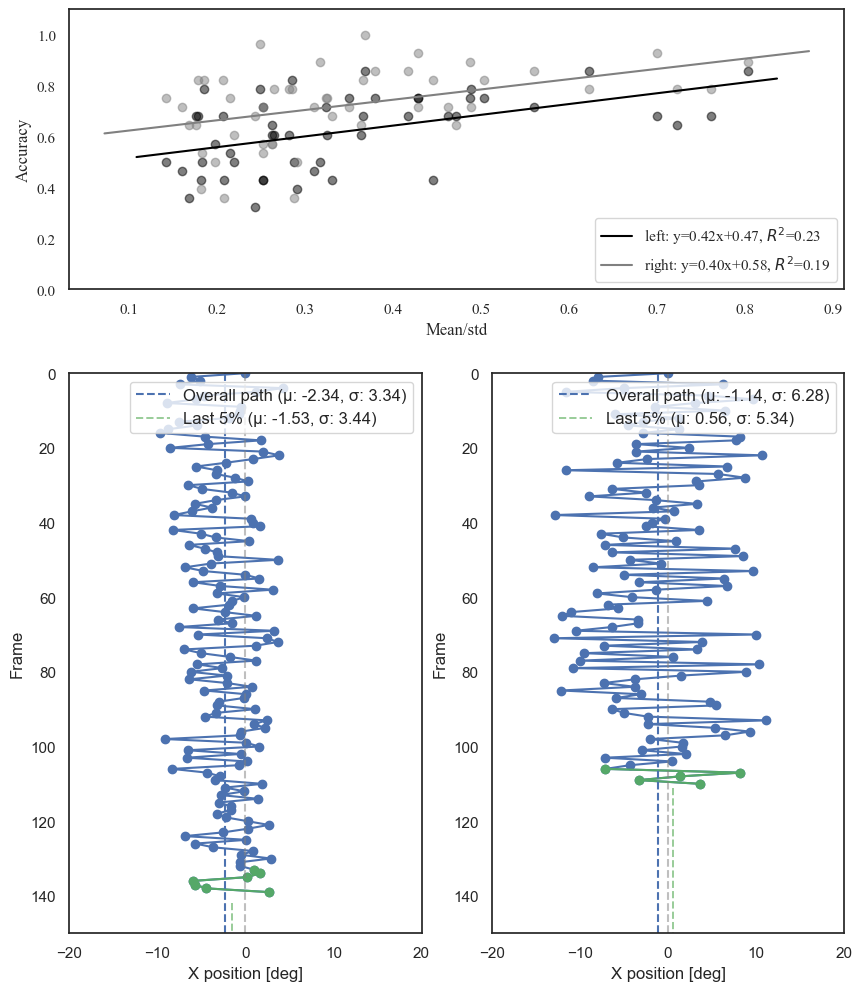

In [49]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

# Установка глобальных параметров для шрифта и размера текста
plt.rcParams.update({
    'font.family':'Times New Roman',
    'font.size': 40
})

def visual(fig, gs, path_5, path_15):
    sns.set(style="white") 

    for idx, (path, percentage) in enumerate(zip([path_5, path_15], [5, 5])):
        inv = len(np.where(path[1:, ] == 0)[0])
        iid_trajectory = path[:-(inv), ]

        mean_iid = round(np.mean(iid_trajectory), 2)
        std = round(np.std(iid_trajectory), 2)
        last_percent = int(len(iid_trajectory) * (percentage / 100))
        mean_last_percent_iid = round(np.mean(iid_trajectory[-last_percent:]), 2)
        std_last_percent_iid = round(np.std(iid_trajectory[-last_percent:]), 2)
        y_start_last_5 = len(iid_trajectory) - int(len(iid_trajectory) * mean_last_percent_iid/100)
        
        ax_traj = fig.add_subplot(gs[1, idx])
        ax_traj.plot(iid_trajectory, range(len(iid_trajectory)), 'o-', color=sns.color_palette('deep')[0])
        ax_traj.plot(iid_trajectory[-last_percent:], range(len(iid_trajectory)-last_percent, len(iid_trajectory)), 'o-', color=sns.color_palette('deep')[2])
        ax_traj.axvline(x=mean_iid, color=sns.color_palette('deep')[0], linestyle='--', label=f'Overall path (μ: {mean_iid}, σ: {std})')
        ax_traj.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

        ax_traj.plot([mean_last_percent_iid,mean_last_percent_iid], [y_start_last_5, 160], color='green', 
                     linestyle='--', label=f'Last {percentage}% (μ: {mean_last_percent_iid:.2f}, σ: {std_last_percent_iid})', alpha=0.4, linewidth=1.4)
        ax_traj.set_xlim(-20, 20)
        ax_traj.set_ylim(150, 0)
        ax_traj.legend(fontsize=12, loc='upper right')
        ax_traj.set_ylabel('Frame')
        ax_traj.set_xlabel('X position [deg]')

# Инициализация фигуры и разделение на субплоты
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2], hspace=0.2)

# График регрессии
ax0 = fig.add_subplot(gs[0, :])
colors = ['black', 'gray', 'silver']
groups = path_info['mean_cond'].unique()

for i, group in enumerate(groups):
    subset = path_info[path_info['mean_cond'] == group]
    ax0.scatter(subset['mean/std'], subset['acc'], alpha=0.5, c=colors[i])

    group_data = path_info[path_info['mean_cond'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(group_data['mean/std'], group_data['acc'])
    x_vals = np.array(ax0.get_xlim())
    y_vals = intercept + slope * x_vals
    ax0.plot(x_vals, y_vals, '-', color=colors[i], label=f'{group}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}')

ax0.set_xlabel('Mean/std')
ax0.set_ylabel('Accuracy')
ax0.set_ylim(0, 1.1)
ax0.legend(loc='lower right')

# Подставьте сюда ваши данные для path_5 и path_15
visual(fig, gs, iid_ok, iid_bad)

plt.show()


In [9]:
iid_last5_ex = iid_left_right[:,11]

In [5]:
import numpy as np

from ddm import Model, Drift, InitialCondition
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision,ICPoint
from ddm.functions import fit_adjust_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [9]:
def draw_line(v,x0,t, Tnd):
    drawn_line=v*(t-Tnd)+x0
    return drawn_line

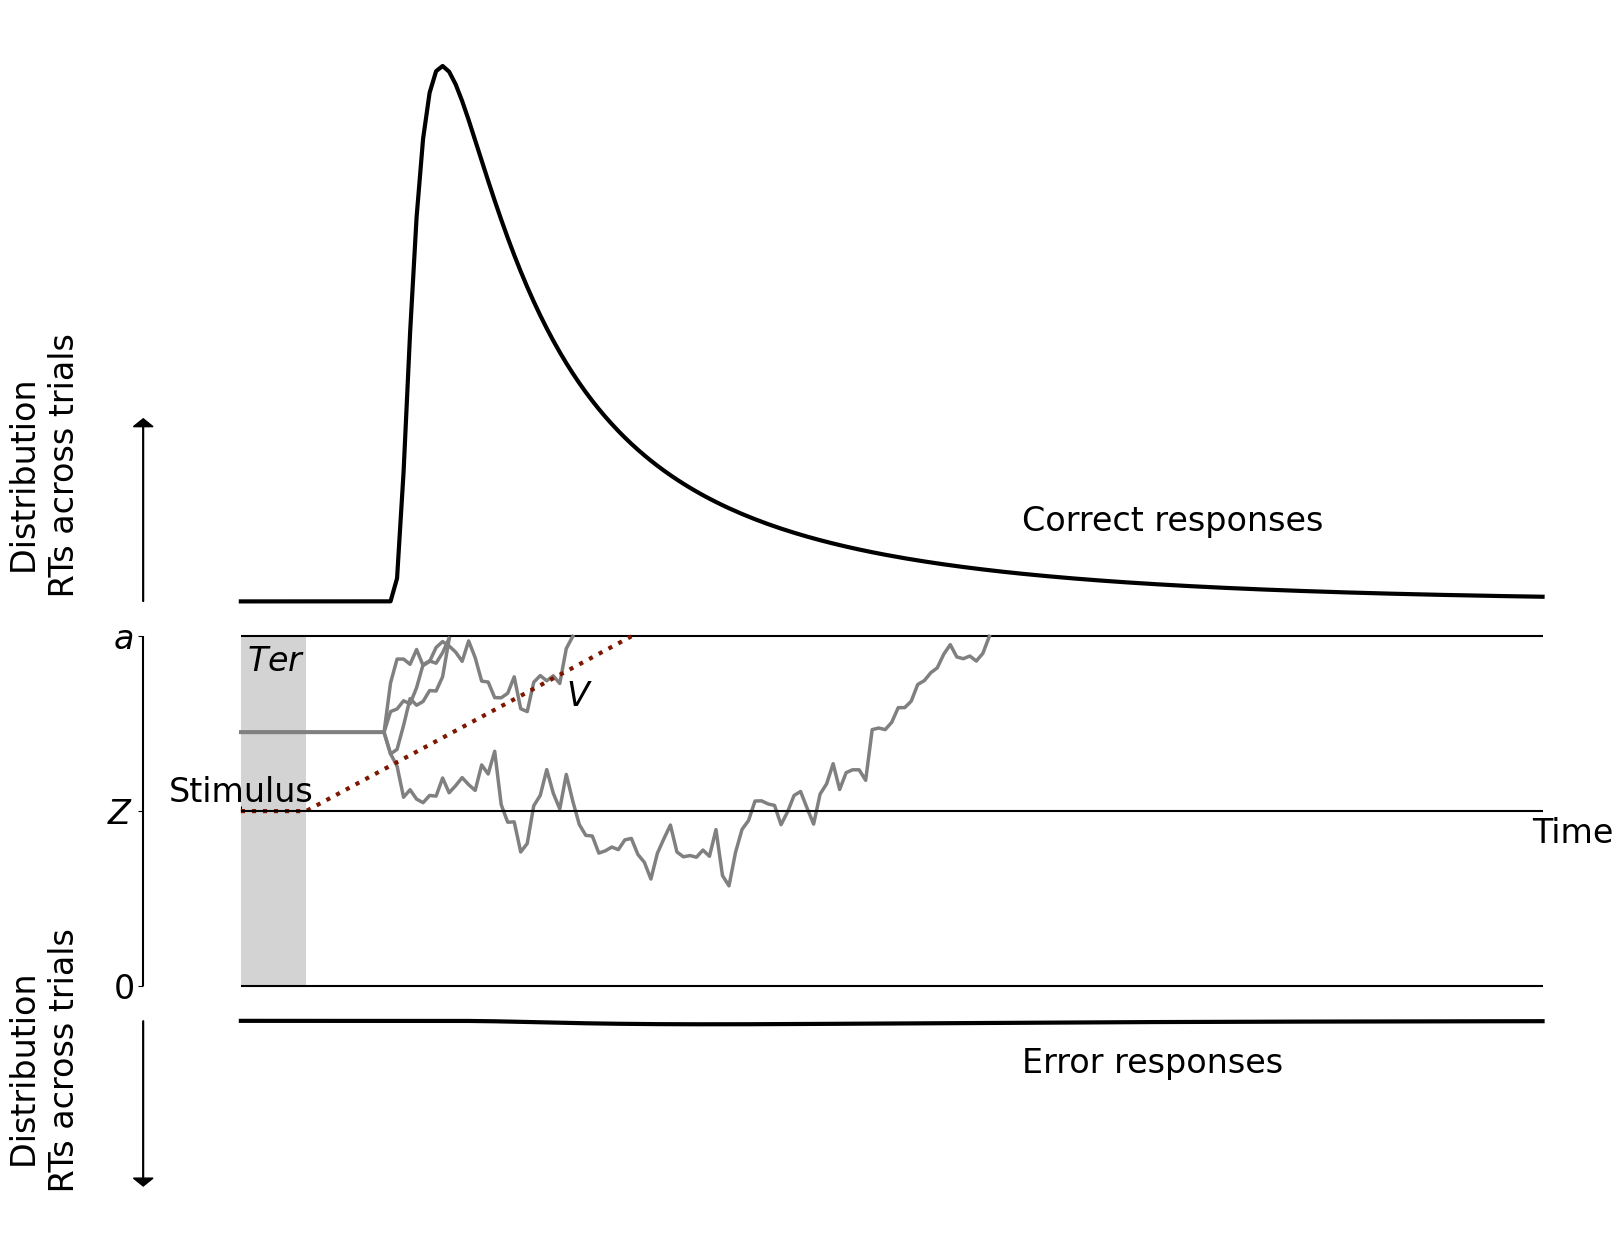

In [11]:
#%% DDM Formalism
# from utilities import draw_line

m = Model(name='Simple model',
              drift=DriftConstant(drift=1.322),
#               noise=NoiseConstant(noise=1.),
              bound=BoundConstant(B=0.981),
              IC = ICPoint(x0 = 0.451),
#               IC = ICPointRatio(x0=-.2)
              # IC=ICIntervalRatio(x0=-0,sz=0),
              overlay=OverlayNonDecision(nondectime=0.228),
              dx=.001, dt=.01, T_dur=2)
s = m.solve()
#here plot the distributions
fig,ax=plt.subplots(figsize=(20,16))

ax.tick_params(axis="x",direction="in", pad=-25)

ax.plot(s.model.t_domain(), s.pdf_corr()+1.2, color='k',linewidth=3) #plot the histogram of correct responses
ax.plot(s.model.t_domain(), -s.pdf_err()-1.2, color='k',linewidth=3)
ax.arrow(-.15, 1.2, 0, 1, color='k',head_width=.03)
ax.arrow(-.15, -1.2, 0, -0.9, color="k",head_width=.03)
plt.text(-.3, 1.2, 'Distribution \n RTs across trials',fontsize=24,rotation='vertical',horizontalalignment='center')
plt.text(-.3,-2.2,'Distribution \n RTs across trials',fontsize=24,rotation='vertical',horizontalalignment='center')

# #here generate the middle of what we want
ax.hlines(1,0,2, color='k')
ax.hlines(-1,0,2, color='k')
for i in range (15,19):
    # trial=m.simulate_trial(seed=i)
    trial=m.simulate_trial(seed=i)
    trial[trial>1]=1
    trial[trial<-1]=-1
    ax.plot(s.model.t_domain()[0:len(trial)],trial, color='gray',linewidth=2.5)#grey

#here we plot other information (Tnd, drift, SP distribution)
ax.fill_between([0,0,0.1,0.1,0],[-1,1,1,-1,-1],edgecolor=None, facecolor='#D3D3D3')#,alpha=0.2)

perfect_trajectory=np.ones((len(s.model.t_domain()),))
begin_drift=np.min(np.where(s.model.t_domain()>0.1)[0])
perfect_trajectory[0:begin_drift]=0
perfect_trajectory[begin_drift::]=draw_line(2,0,s.model.t_domain(),0.1)[begin_drift::]
ix_end=np.min(np.where(perfect_trajectory>1))
ax.plot(s.model.t_domain()[0:ix_end],perfect_trajectory[0:ix_end],color='#7E1700',linewidth=3.,linestyle="dotted")

sns.despine()
ax.spines['left'].set_position(('data', -0.15))
ax.spines['left'].set_visible(False)
ax.vlines(-0.15,-1,1, color='k')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_visible(False)
ax.hlines(0,0,2,color='k')

# ax.fill_between([-0.15,-0.15,-0.05,-0.05,-0.15],[-.44,.04,.04,-.44,-.44],edgecolor=None, facecolor='#A9A9A9')#,alpha=0.4)

ax.set_yticks([1,-0,-1])
ax.set_yticklabels([r'$a$',r'$Z$',r'$0$'],fontsize=24)

ax.set_xticks([0])
ax.set_xticklabels(['Stimulus'], fontsize=24)

# ax.set_ylabel('Decision variable',fontsize=24)
# ax.yaxis.set_label_coords(-0.07,0.4)
ax.set_xlabel('Time',fontsize=24,loc='right')

plt.text(1.2, 1.6, 'Correct responses',fontsize=24)
plt.text(1.2,-1.5,'Error responses',fontsize=24)

plt.text(0.01,0.8,r'$T{er}$',fontsize=24)
plt.text(0.5,0.6,r'$V$',fontsize=24)
plt.savefig('dummy_DDM.png', dpi=300)